## Lesson 3 Homework
### TLombardi

In [1]:
# Imports
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

#### 1. Download 1Million NYC taxi & Unzip the file

In [2]:
# Read file path
trip_filepath = "C:/Users/TVL/Desktop/SP20_GeoAI/Lesson03/trips-1M.csv/trips-1M.csv"

#### 2. Load NYC taxi data into a Pandas data frame

In [3]:
# Read the file into a variable train_data
trip_df = pd.read_csv(trip_filepath,
                      delimiter=',',
                      index_col=False,
                      header=0,
                      parse_dates=["pdate", "ddate"])
trip_df.dtypes

medallion            object
license              object
vendor               object
rate_cd               int64
flag                 object
pdate        datetime64[ns]
ddate        datetime64[ns]
passcount             int64
triptime              int64
tripdist            float64
plon                float64
plat                float64
dlon                float64
dlat                float64
dtype: object

In [4]:
trip_df.shape

(999999, 14)

In [5]:
# Display a random sampling of 5 rows
trip_df.sample(5, random_state=0)

,medallion,license,vendor,rate_cd,flag,pdate,ddate,passcount,triptime,tripdist,plon,plat,dlon,dlat
157105,2236842A05A21454CC92A6BCCA9CEBB3,DC7F87794AC7FDA5C7BA9BBEEBF32E2B,VTS,1,NaN,2013-01-13 20:08:00,2013-01-13 20:17:00,6,540,1.88,-74.006424,40.739777,-73.997635,40.724419
374554,2A487A0A70F8C672070050A3CF7C376B,8B0D6FA15A2FAB79C4CE962168B3F80C,VTS,1,NaN,2013-01-14 23:56:00,2013-01-15 00:07:00,1,660,2.68,-73.983490,40.766178,-74.002274,40.733154
973251,494E5471942EE464607F54AC3611B493,B4F108A9D9A5EB04895D843DACDBEF6F,VTS,1,NaN,2013-01-01 09:40:00,2013-01-01 10:09:00,1,1740,15.59,-74.010468,40.729916,-73.868660,40.858063
265381,9A8A9BB52D429B491DF9CDF1D5E0877A,E60EE8FFED4FC860562193CA46178E78,VTS,3,NaN,2013-01-14 16:26:00,2013-01-14 16:59:00,2,1980,18.96,-73.966888,40.769951,-74.178749,40.689133
687074,97576A28817DE822E51EE06A8F39B121,5AB656A83A7F3A6FB748083983725F18,VTS,1,NaN,2013-01-16 11:46:00,2013-01-16 11:49:00,1,180,0.50,-74.007980,40.740269,-74.008469,40.734268


In [6]:
trip_df.head()

,medallion,license,vendor,rate_cd,flag,pdate,ddate,passcount,triptime,tripdist,plon,plat,dlon,dlat
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


#### 3. Find the missing string values and replace them with ‘N/A’

In [7]:
trip_df.isnull().sum()

medallion         0
license           0
vendor            0
rate_cd           0
flag         996464
pdate             0
ddate             0
passcount         0
triptime          0
tripdist          0
plon              0
plat              0
dlon              0
dlat              0
dtype: int64

In [8]:
trip_df[trip_df.flag.isnull()]

,medallion,license,vendor,rate_cd,flag,pdate,ddate,passcount,triptime,tripdist,plon,plat,dlon,dlat
157,F6F7D02179BE915B23EF2DB57836442D,088879B44B80CC9ED43724776C539370,VTS,1,NaN,2013-01-13 04:36:00,2013-01-13 04:46:00,5,600,3.12,-73.996933,40.720055,-73.993546,40.693043
158,BE386D8524FCD16B3727DCF0A32D9B25,4EB96EC9F3A42794DEE233EC8A2616CE,VTS,1,NaN,2013-01-13 04:37:00,2013-01-13 04:48:00,2,660,3.39,-74.000313,40.730068,-73.987373,40.768406
159,E9FF471F36A91031FE5B6D6228674089,72E0B04464AD6513F6A613AABB04E701,VTS,1,NaN,2013-01-13 04:41:00,2013-01-13 04:45:00,1,240,1.16,-73.997292,40.720982,-74.000443,40.732376
160,E4CF46763B08F900DC762EDEB6C37D2D,92A6C54F05688F8E5CD2E32BBCB4FBA9,VTS,1,NaN,2013-01-13 04:39:00,2013-01-13 04:49:00,1,600,3.60,-73.993134,40.692734,-74.010071,40.720856
161,A5D125F5550BE7822FC6EE156E37733A,08DB3F9FCF01530D6F7E70EB88C3AE5B,VTS,1,NaN,2013-01-13 04:37:00,2013-01-13 04:47:00,5,600,2.91,-73.966843,40.756741,-73.987885,40.722713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,171FD91CBF0D6FABF499A9452A4950D5,6984272123F8A8E43DAB2EF9414B6BAC,VTS,1,NaN,2013-01-01 13:25:00,2013-01-01 13:27:00,1,120,0.72,-73.961723,40.759514,-73.956772,40.767277
999995,BAAC72BF93F2D99F9DC0CD38CB53F96D,5599EA08F33A7F9B45C5C15593091928,VTS,1,NaN,2013-01-01 13:29:00,2013-01-01 13:32:00,1,180,0.68,-73.985519,40.747135,-73.994110,40.746548
999996,B505BF57EE08B47D1A9A28F746C46A37,E6BAE5EC37802B0975F643954B0F3ECB,VTS,1,NaN,2013-01-01 13:24:00,2013-01-01 13:29:00,1,300,1.21,-73.982368,40.770718,-73.977699,40.786331
999997,41196E5493047745905908211F50A1A3,3949B8D06E444959B5C5ADE482639B81,VTS,1,NaN,2013-01-01 13:31:00,2013-01-01 13:34:00,1,180,1.24,-73.965111,40.755207,-73.955132,40.768948


In [9]:
trip_df['flag'] = trip_df.flag.fillna('N/A')

In [10]:
# Display a random sampling of 5 rows
trip_df.sample(5, random_state=0)

,medallion,license,vendor,rate_cd,flag,pdate,ddate,passcount,triptime,tripdist,plon,plat,dlon,dlat
157105,2236842A05A21454CC92A6BCCA9CEBB3,DC7F87794AC7FDA5C7BA9BBEEBF32E2B,VTS,1,N/A,2013-01-13 20:08:00,2013-01-13 20:17:00,6,540,1.88,-74.006424,40.739777,-73.997635,40.724419
374554,2A487A0A70F8C672070050A3CF7C376B,8B0D6FA15A2FAB79C4CE962168B3F80C,VTS,1,N/A,2013-01-14 23:56:00,2013-01-15 00:07:00,1,660,2.68,-73.983490,40.766178,-74.002274,40.733154
973251,494E5471942EE464607F54AC3611B493,B4F108A9D9A5EB04895D843DACDBEF6F,VTS,1,N/A,2013-01-01 09:40:00,2013-01-01 10:09:00,1,1740,15.59,-74.010468,40.729916,-73.868660,40.858063
265381,9A8A9BB52D429B491DF9CDF1D5E0877A,E60EE8FFED4FC860562193CA46178E78,VTS,3,N/A,2013-01-14 16:26:00,2013-01-14 16:59:00,2,1980,18.96,-73.966888,40.769951,-74.178749,40.689133
687074,97576A28817DE822E51EE06A8F39B121,5AB656A83A7F3A6FB748083983725F18,VTS,1,N/A,2013-01-16 11:46:00,2013-01-16 11:49:00,1,180,0.50,-74.007980,40.740269,-74.008469,40.734268


#### 4. Find the missing numerical values and replace them with 0

In [11]:
# Replace NaN values with 0
trip_df = trip_df.replace(np.nan,0)

In [12]:
# Export clean data to new csv
trip_df.to_csv('C:/Users/TVL/Desktop/SP20_GeoAI/Lesson03/trips-1M.csv/trip-clean.csv', 
               encoding='utf-8', 
               index=None)

#### 5. Filter the data geographically to be in the Manhattan area.

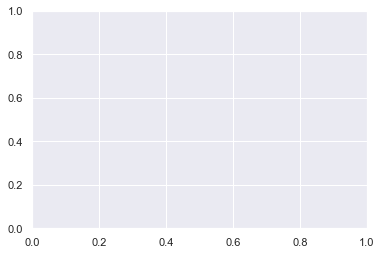

In [13]:
# Set default aesthetic parameters
sns.set()

# Set spatial boundary (bounding box) for lower Manhattan
lon_min,lat_min,lon_max,lat_max=[-74.023933, # left
                                 40.700683, # bottom
                                 -73.958015, # right
                                 40.760781] # top

# Load the data and extract only lat/lon pickup locations
data=np.loadtxt(r'C:\Users\TVL\Desktop\SP20_GeoAI\Lesson03\trips-1M.csv\trip-clean.csv',
                skiprows=1,
                delimiter=',',
                usecols=(11,12))

# Make views
x = data[:,0]
y = data[:,1]

# Boolean filter the data based on spatial boundary
data = data[(lat_min<y)&
            (y<lat_max)&
            (lon_min<x)&
            (x<lon_max)]

# Create a KDE plot of the first 10,000 records
n = 10000
ax = sns.kdeplot(data=data[:n,0],
                 data2=data[:n,1],
                 shade=True)

#### 6. Show in a graph the number of pickups by the hour, where x axis is the hour

In [14]:
# Add column with pickup hour of day value
trip_df = trip_df.set_index('pdate')
trip_df['phour'] = trip_df.index.hour

# Display a random sampling of 5 rows
trip_df.sample(5, random_state=0)

,medallion,license,vendor,rate_cd,flag,ddate,passcount,triptime,tripdist,plon,plat,dlon,dlat,phour
pdate,,,,,,,,,,,,,,
2013-01-13 20:08:00,2236842A05A21454CC92A6BCCA9CEBB3,DC7F87794AC7FDA5C7BA9BBEEBF32E2B,VTS,1,N/A,2013-01-13 20:17:00,6,540,1.88,-74.006424,40.739777,-73.997635,40.724419,20
2013-01-14 23:56:00,2A487A0A70F8C672070050A3CF7C376B,8B0D6FA15A2FAB79C4CE962168B3F80C,VTS,1,N/A,2013-01-15 00:07:00,1,660,2.68,-73.983490,40.766178,-74.002274,40.733154,23
2013-01-01 09:40:00,494E5471942EE464607F54AC3611B493,B4F108A9D9A5EB04895D843DACDBEF6F,VTS,1,N/A,2013-01-01 10:09:00,1,1740,15.59,-74.010468,40.729916,-73.868660,40.858063,9
2013-01-14 16:26:00,9A8A9BB52D429B491DF9CDF1D5E0877A,E60EE8FFED4FC860562193CA46178E78,VTS,3,N/A,2013-01-14 16:59:00,2,1980,18.96,-73.966888,40.769951,-74.178749,40.689133,16
2013-01-16 11:46:00,97576A28817DE822E51EE06A8F39B121,5AB656A83A7F3A6FB748083983725F18,VTS,1,N/A,2013-01-16 11:49:00,1,180,0.50,-74.007980,40.740269,-74.008469,40.734268,11


Text(0.5, 0, 'Hour of the Day')

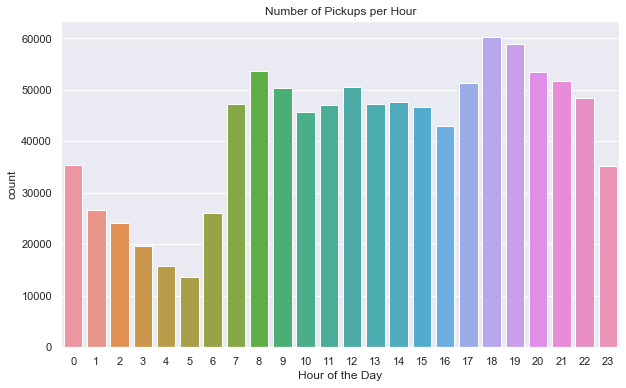

In [15]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Number of Pickups per Hour")

# Bar chart showing total counts of pickups per hour of the day
sns.countplot('phour', data=trip_df)

# Add label for vertical axis
plt.xlabel("Hour of the Day")

#### 7. Filter the data geographically to be around JFK

#### 8. Show in a graph the number of dropoffs with more than 2 passengers after 7PM, where x axis is the hour

In [16]:
# Add column with dropoff hour of day value
trip_df = trip_df.set_index('ddate')
trip_df['dhour'] = trip_df.index.hour

# Display a random sampling of 5 rows
trip_df.sample(5, random_state=0)

,medallion,license,vendor,rate_cd,flag,passcount,triptime,tripdist,plon,plat,dlon,dlat,phour,dhour
ddate,,,,,,,,,,,,,,
2013-01-13 20:17:00,2236842A05A21454CC92A6BCCA9CEBB3,DC7F87794AC7FDA5C7BA9BBEEBF32E2B,VTS,1,N/A,6,540,1.88,-74.006424,40.739777,-73.997635,40.724419,20,20
2013-01-15 00:07:00,2A487A0A70F8C672070050A3CF7C376B,8B0D6FA15A2FAB79C4CE962168B3F80C,VTS,1,N/A,1,660,2.68,-73.983490,40.766178,-74.002274,40.733154,23,0
2013-01-01 10:09:00,494E5471942EE464607F54AC3611B493,B4F108A9D9A5EB04895D843DACDBEF6F,VTS,1,N/A,1,1740,15.59,-74.010468,40.729916,-73.868660,40.858063,9,10
2013-01-14 16:59:00,9A8A9BB52D429B491DF9CDF1D5E0877A,E60EE8FFED4FC860562193CA46178E78,VTS,3,N/A,2,1980,18.96,-73.966888,40.769951,-74.178749,40.689133,16,16
2013-01-16 11:49:00,97576A28817DE822E51EE06A8F39B121,5AB656A83A7F3A6FB748083983725F18,VTS,1,N/A,1,180,0.50,-74.007980,40.740269,-74.008469,40.734268,11,11


In [17]:
# Query dataframe for selection
pass3slxn = trip_df.loc[(trip_df.dhour > 18) & 
                        (trip_df.passcount > 2)]

Text(0.5, 0, 'Hour of the Day')

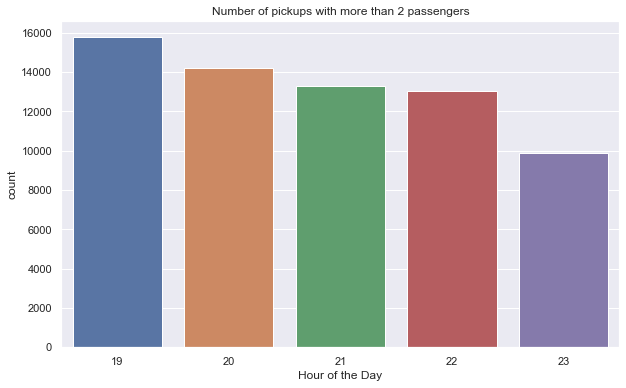

In [18]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Number of pickups with more than 2 passengers")

# Bar chart showing total counts of pickups per hour of the day
sns.countplot('dhour', data=pass3slxn)

# Add label for vertical axis
plt.xlabel("Hour of the Day")

#### 9. Create a function that projects the coordinates to web Mercator and apply that function to create 4 new fields for pickup and dropoff locations

#### 10. Create a function that calculates the Euclidean distance between web Mercator pickup and drop-offs

#### 11. Plot Euclidian distance distribution where distance is less than 20 kilometers.

#### 12. GeoEnrich pickup and dropoff locations with zip code polygo